## General instructions

Please fill out the answers to the questions below in markdown blocks (for questions) and coding blocks (for coding exercises).

For some programming questions, some hints have already been provided for you. Add additional blocks if you need them (e.g. to explain your answers). Try to answer each question succinctly.

In the coding exercises, you may use ``pandas``, ``numpy`` and ``scipy`` routines, but **not** scikit-learn (``sklearn``). You may use ``matplotlib`` or ``seaborn`` for plotting.

Submit the completed notebook after filling in all the questions and please make sure that the answers are visible without needing to execute each code block (i.e. so the code block has already been executed). When marking the assignment we will not run any code if this has not been done.

## AI statement

For this assingment I worked in google colab and often after typing a code google colab suggests the next codes. So, therefore, it really helped with getting the next step and in most cases it was correctly done. The corresponding codes for the objective I had I came up with them from the practicals and websites of packages (numpy etc.) If it gave an error I critically looked at the mistake and if I was stuck I used AI for corrections. In most cases these were interpunctions details and other typos. I also used AI to ask questions were I came with a suggestion and were I received feedback on the next step. Overall, I think it was quite difficult to interpretate the questions correctly, especially the microarray database in assingment 2. With students we discussed this part but still not quite sure what was asked and if I did correctly. So, especially for this assingment I used AI to come up with ideas. For assingment 1, everthing I collaborated with other students. Especially in part 3 I used AI for the sm.add_constant(X) command and helped me with defining formulas for part 3.5 and 3.6. After I got forumales I designed the codes by myself where I want to express again that google colab does really good suggestions in advance.

## Part 1: Basic Algebra and Data Handling

### Task 1.1 (1 point)

Suppose that you are given a data matrix (X) that summarises the expenditure of 10 different hospitals across a 6 month period, where the the hospitals are stored one per row and the months are stored one per column. Print out a vector that you can multiply this matrix with to yield the following quantities. In other words, give the vector v that causes the matrix-vector product **X * v** to yield the following:

1. The difference in the total expenditure for each hospital between the first three and the last three months
2. The total expenditure of the first two months minus the average expenditure for each hospital for the the last four monthmonths

In [1]:
import numpy as np
X = np.random.rand(10,6) # dummy data

v1 = np.sum(X[:,0:3]-X[:,3:6],axis=1)

v2 = np.sum(X[:,0:2], axis=1)-np.average(X[2:6])

print(f"difference in total expenditure between first three and last three months: {v1}")
print(f"total expenditure of first two months minus the average of the last four months: {v2}")

difference in total expenditure between first three and last three months: [ 1.06099335  0.76018989  0.44450972  1.37767693 -0.34476631  0.80284853
 -0.78444907  0.10576905  0.11559643  0.56275421]
total expenditure of first two months minus the average of the last four months: [ 0.48142079  0.39317472  0.16047648  1.15946128 -0.00449316  1.03496243
  0.80109311  0.77777646  0.13321879  1.05879251]


### Task 1.2 (1 point)

Write a short piece of code that uses an eigendecomposition to determine the rank of the following matrix. Check your answer by computing the rank directly using the function np.linalg.matrix_rank():

In [2]:
import numpy as np

X = np.array([[ -2., 20., -6.,  7.,  7., 4.],
              [ 9., 5., 9.,  7.,  7., 0.],
              [ -1., 3., 4.,  -2.,  9., -27.],
              [ 8., 11., 2.,  9.,  4., 16.],
              [ 4., 19.,  -3.,  8.,  8., 7.],
              [ 6., 7.,  7., 10.,  4., 11.]])

In [3]:
eigvals, eigvecs = np.linalg.eig(X)

U, S, Vt = np.linalg.svd(X)
rank = np.sum(S > 1e-10)
print(f"Rank of the matrix: {rank}")

np.linalg.matrix_rank(X)
print(f"Rank of the matrix: {np.linalg.matrix_rank(X)}")

Rank of the matrix: 4
Rank of the matrix: 4


### Task 1.3 (2 points)

Download the data below and perform a basic quality control procedure using basic statistical operations. You can assume that the data contain demographic measures plus some biological features (it does not matter what these are for the purposes of this exercies).

Then answer the following  questions:

1. Which subject has the most missing data? How many missing features does this subject have?
2. Which are the features most likely to contain outliers? How many samples would you remove? Give reasons for your choice

In [4]:
!wget -nc https://raw.githubusercontent.com/predictive-clinical-neuroscience/BigDataCourse/main/data/qc_dataset.csv

--2025-12-13 20:33:36--  https://raw.githubusercontent.com/predictive-clinical-neuroscience/BigDataCourse/main/data/qc_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648561 (633K) [text/plain]
Saving to: ‘qc_dataset.csv’

qc_dataset.csv      100%[===================>] 633.36K  --.-KB/s    in 0.009s  

2025-12-13 20:33:36 (72.4 MB/s) - ‘qc_dataset.csv’ saved [648561/648561]



In [5]:
import pandas as pd
df = pd.read_csv("qc_dataset.csv")
df.info()

missing_df = df.isnull()
rows_with_missing = missing_df[missing_df.any(axis=1)]

missing_count_per_row = missing_df.sum(axis=1)
row_most_missing = missing_count_per_row.idxmax()
num_missing_features = missing_count_per_row.max()

print(f"feature most missing value: {row_most_missing:.3f}")
print(f"number of missing values : {num_missing_features:.3f}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 73 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      501 non-null    int64  
 1   age     501 non-null    int64  
 2   sex     501 non-null    int64  
 3   f0      501 non-null    float64
 4   f1      501 non-null    float64
 5   f2      501 non-null    float64
 6   f3      501 non-null    float64
 7   f4      501 non-null    float64
 8   f5      501 non-null    float64
 9   f6      501 non-null    float64
 10  f7      501 non-null    float64
 11  f8      501 non-null    float64
 12  f9      501 non-null    float64
 13  f10     501 non-null    float64
 14  f11     501 non-null    float64
 15  f12     501 non-null    float64
 16  f13     501 non-null    float64
 17  f14     501 non-null    float64
 18  f15     501 non-null    float64
 19  f16     501 non-null    float64
 20  f17     501 non-null    float64
 21  f18     501 non-null    float64
 22  f1

        id    age    sex     f0     f1     f2     f3     f4     f5     f6  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
496  False  False  False  False  False  False  False  False  False  False   
497  False  False  False  False  False  False  False  False  False  False   
498  False  False  False  False  False  False  False  False  False  False   
499  False  False  False  False  False  False  False  False  False  False   
500  False  False  False   True  False   True  False  False   True   True   

     ...    f60    f61    f62    f63    f64    f65    f66    f67    f68    

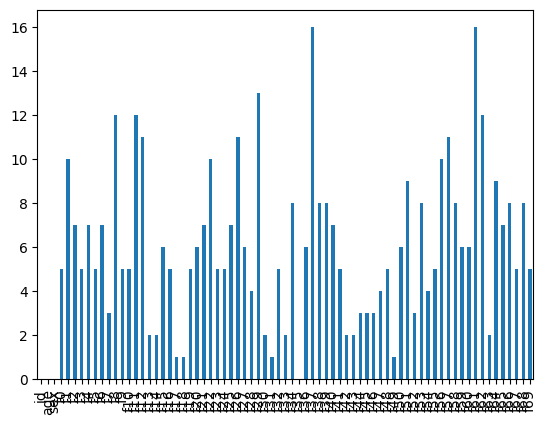

In [6]:
import matplotlib.pyplot as plt

df.describe()
IQR = df.quantile(0.75) - df.quantile(0.25)

upper = df.quantile(0.75) + 1.5 * IQR
lower = df.quantile(0.25) - 1.5 * IQR

outliers = (df < lower) | (df > upper)
print(outliers)

outlier_count_per_columns = outliers.sum(axis=0)
print(outlier_count_per_columns)

top5_outliers = outlier_count_per_columns.sort_values(ascending=False).head(5)
print(top5_outliers)

plot = outlier_count_per_columns.plot(kind='bar')

1. Factor 37 and 61 contains the most outliers with 16 in total. Other way to answer this questions is with boxplots but I think that having so many boxplots makes it less clear for me.
2. For this question I made a graph which counts all the outliers for each feature. I made this based on the IQR values from each feature and multiplied this value by either -1.5 (lower) or 1.5 (upper) bounds. This gives me outliers for each seperate feature. Next, I summed the outliers for each feature, made a top-5 and plotted it. Which features are typically expected to contain outliners is unknown, I think it depends on the biological variable that is assessed. Therefore, I would not remove any outliers as it better represents the bigger population and could introduce bias. Also, it highly depends on the purpose of this research where I have unsifficent information about.

### Task 1.4 (1 point)

What do we use the Digital Research Environment for?

1. Data collection
2. Data processing and analysis
3. Collaborating on shared data with external parties
4. Archiving
5. Making data FAIR

select all answers that apply.

Answer: all of them are correct

# Part 2: Machine learning and statistics

### Task 2.1 (1 point)

1. Describe the function of the parameter $\gamma$ in support vector machines (following the notation given in the lectures). How does it prevent overfitting?

Support vector machines contain a hyperplane between different classes to maximize the distance between classes. The most nearby factor is called the support vectors. The $\gamma$ parameter is used in non-lineaer support vector machines and controls the shape of the hyperplane. If $\gamma$ is high, the model looks very closely at each point, that results in that the hyperplane follows closely that could cause that the noise might be fitted. This can lead to overfitting. So, by choosing a smaller $\gamma$, you reduce the risk of overfitting.

2. Linear models have different kinds of parameters. Briefly describe the different functions of the parameters denoted $w$ and $\theta$ given in the machine learning lecture.

Linear models don't have the gamma parameter and fits only a straight line without closely following the datapoints. $w$ means the weight of the data and
determines how much each input feature contributes to the output, also seen as the slope. $\theta$ is independent of the input features and can make the slope go up or down. It gives the baseline if all values are zero.

### Task 2.2 (1 point)

Considering the following scenario:

A researcher wants to train a classifier to predict Parkinson's disease and acquires some neuroimaging data to do this. First, the researcher selects the most informative features from the imaging data using a t-test. Next, the researcher trains a classifier on these features using cross-validation and obtains classification accuracy of 75% for discriminating patients from controls. The researcher shows that this is statistically better than chance (50%) using a binomial test.

Would you consider this to be a solid workflow? Why or why not?

I think that this workflow as the data is not independent of the test data. With doing t-testing features are already decided for the trained model. Now features are already selected from the whole data set which causes cross-validation not to be valid. It is fine to do t-testing for the training dataset but not the test dataset.

### Task 2.3 (1 point)

Suppose that you are the data scientist working for clinic that performs biopsies for lung cancer. In this clinic, you know that using a 'gold standard' test, approximately 5% of the samples that are tested come back positive for lung cancer and you test approximately 1000 people per year. You are evaluating a new test that according to the manufacturer has a sensitivity of approximately 80% and a specificity of 95% but is appealing because it is much faster than the gold standard test, meaning that the patients will have their results the same day instead of having to wait a week.

First, write a small block of python code to estimate the accuracy, positive and negative predictive value of the test under the scenario above.


In [7]:
sensitivity = 0.80
specificity = 0.95
diseased = 50
non_diseased = 950
total_population = 1000

true_positive = sensitivity*diseased
true_negative = specificity*non_diseased
false_positive = (1-specificity)*non_diseased
false_negative = (1-sensitivity)*diseased

accuracy = (true_positive + true_negative)/total_population
positive_predictive_value = true_positive/(true_positive+false_positive)
negative_predictive_value = true_negative/(true_negative+false_negative)

print(f"Accuracy: {accuracy:.3f}")
print(f"Positive Predictive Value (PPV): {positive_predictive_value:.3f}")
print(f"Negative Predictive Value (NPV): {negative_predictive_value:.3f}")

Accuracy: 0.943
Positive Predictive Value (PPV): 0.457
Negative Predictive Value (NPV): 0.989


### Task 2.4 (1 point)

Would you switch to the new test? Give reasons for your answer. Can you think of factors that would change your preference?

The PPV of 45.7% is relatively low, meaning that less than half of positive test results are true positives. It would be unethical to tell someone they probably have lung cancer if there’s a high chance it’s a false positive, especially since follow-up tests, such as CT scans, PET/CT, or biopsy, can be invasive, stressful, or costly. Therefore, it’s safer to stick with the gold standard, which likely has a PPV around 90%, to reduce false positives and unnecessary procedures.

### Task 2.5 (1 point)

Consider the following scenario: a researcher would like to use a clustering algorithm to find subtypes of asthma. The researcher acquires biomedical data, including: 3 lung function parameters from a breath outflow test, 10 blood-based markers (that you can assume are known to be associated with asthma) and 100 genetic variables (that have each been associated with asthma in at least one study). The researcher trains a K-means algorithm across 2-5 clusters and finds that the 5 cluster solution is the most reproducible (statistically significant at p < 0.01).

Please answer the following questions:

1. Would you consider this to be acceptable evidence to determine that biological subtypes exist?

No, I think this is not sufficient evidence that biological subtypes exist. Clustering always produce clusters, even in random or unstructured data. High-dimensional data can create apparent structure where none exists, so statistical reproducibility alone is not enough. True subtypes would require biological validation if they correspond to real differences in disease mechanism.

2. Please briefly outline what addtional validation steps you would recommend to determine whether the clusters can be used to improve prediction of outcomes in asthma

To validate the algorithm it should be tested whether the same clusters can be reproduced in a separate cohort. And check if the clusters are associated with meaningful outcomes, such as symptom severity, exacerbation frequency, or treatment response in real patients.

### Task 2.6 (1 point)

Matrix decomposition techniques are important ways to reduce dimensionality in big data cohorts. Provide brief answers to the following questions:

1. What are the steps needed to perform principal components analysis (PCA) on the basis of an eigendecomposition?

At first, subsract the mean from the data for all the features. Then perform eigenvectors and eigenvalues decomposition on the covariance matrix. Eigenvectors with larger eigenvalues correspond to directions with more variance.

2. What is the difference between running linked ICA on multimodal data from concatenating the data and running PCA?

PCA treats the features from the modalities equal and reduces dimensionality by finding directions of maximum overall variance. ICA defines statistically independent components. Linked ICA uses seperate ICAs but links them with same subject courses. This makes linked ICA suitable for multimodal biomedical data such as neuroimaging in contrast to PCA that might miss.


## Part 3: Analysis of Parkinson's disease dataset

For this part of the assignment, we will work with electronic measurements of voice characteristics from 42 people with early-stage Parkinson's disease. These participants were included in a six-month trial of a telemonitoring device for remote symptom progression monitoring. The motivation is that Parkinson's disease affects the characteristics of the voice in a way that might be associated with disease progression. See [here](https://archive.ics.uci.edu/ml/datasets/Parkinsons+Telemonitoring) for a description of the data. Note that the UPDRS (Unified Parkinson's Disease Rating Scale) is a standard scale for rating the symptoms of Parkinson's disease across different domains.

For this assignment, we have split the dataset into two parts, which you can download here:

In [8]:
!wget -nc https://raw.githubusercontent.com/predictive-clinical-neuroscience/BigDataCourse/main/data/parkinsons_updrs_dataset1.csv
!wget -nc https://raw.githubusercontent.com/predictive-clinical-neuroscience/BigDataCourse/main/data/parkinsons_updrs_dataset2.csv

--2025-12-13 20:33:38--  https://raw.githubusercontent.com/predictive-clinical-neuroscience/BigDataCourse/main/data/parkinsons_updrs_dataset1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 871968 (852K) [text/plain]
Saving to: ‘parkinsons_updrs_dataset1.csv’

parkinsons_updrs_da 100%[===================>] 851.53K  --.-KB/s    in 0.01s   

2025-12-13 20:33:38 (85.4 MB/s) - ‘parkinsons_updrs_dataset1.csv’ saved [871968/871968]

--2025-12-13 20:33:38--  https://raw.githubusercontent.com/predictive-clinical-neuroscience/BigDataCourse/main/data/parkinsons_updrs_dataset2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.co

### Task 3.0 (1 point, bonus question)
Load the data and count the number of rows and columns

In [9]:
df1 = pd.read_csv("parkinsons_updrs_dataset1.csv")
df1.shape

(4068, 23)

Rows = 4068
Columns = 23

### Task 3.1 (2 points)

Your first task is to perform PCA on the first data matrix ("parkinsons_updrs_dataset1"), then:

* plot the eigenvalues sorted from largest to smallest
* print the number of components you would need to retain 99.9% of the variance in the data

In [10]:
import numpy as np

x = df1
m = np.mean(x,axis=0)
x = x - m
covmat = np.cov(x.T)
evals, evecs = np.linalg.eig(covmat)

evals = np.sort(evals)[::-1]

print(evals)

[2.87025432e+06 2.88107271e+03 1.81726090e+02 6.64282330e+01
 1.74905495e+01 4.41101672e+00 1.86223095e-01 1.27229881e-01
 2.04369084e-02 5.46928103e-03 4.77209020e-03 2.50933981e-03
 1.10852322e-03 1.03213188e-04 4.60918044e-05 3.72019853e-05
 6.53950481e-06 3.67898636e-06 7.51813692e-07 3.11068622e-07
 1.77434449e-10 6.75555254e-12 6.49127731e-12]


Number of components that explain 99.9% of the data: 2


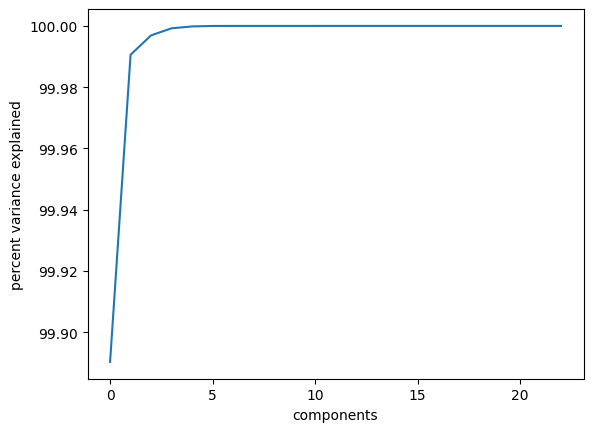

In [11]:
pve = np.cumsum(evals)/np.sum(evals)*100
pve99 = np.where(pve >= 99.9)[0][0] + 1
print(f"Number of components that explain 99.9% of the data: {pve99}")

plt.figure()
plt.plot(range(0,np.size(evals)),pve)
plt.xlabel('components');
plt.ylabel('percent variance explained');

### Task 3.2 (1 point)

Your next task is to fit a GLM to predict symptom severity ('total_UPDRS') on the basis of age, sex and the 16 biomedical voice measurements using only the first part of the Parkinson dataset. Don't forget to account for the fact that the symptom severity does not have a zero mean. Print out the regression coefficients and make a plot of them

Features used: ['age', 'sex', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 4068
Model:                            GLM   Df Residuals:                     4049
Model Family:                Gaussian   Df Model:                           18
Link Function:               Identity   Scale:                          96.049
Method:                          IRLS   Log-Likelihood:                -15048.
Date:                Sat, 13 Dec 2025   Deviance:                   3.8890e+05
Time:                        20:33:47   Pearson chi2:                 3.89e+05
No. Iterations:                     3   Pseudo R-squ. (CS):             0.1897
Covariance Type:            nonrobust                         

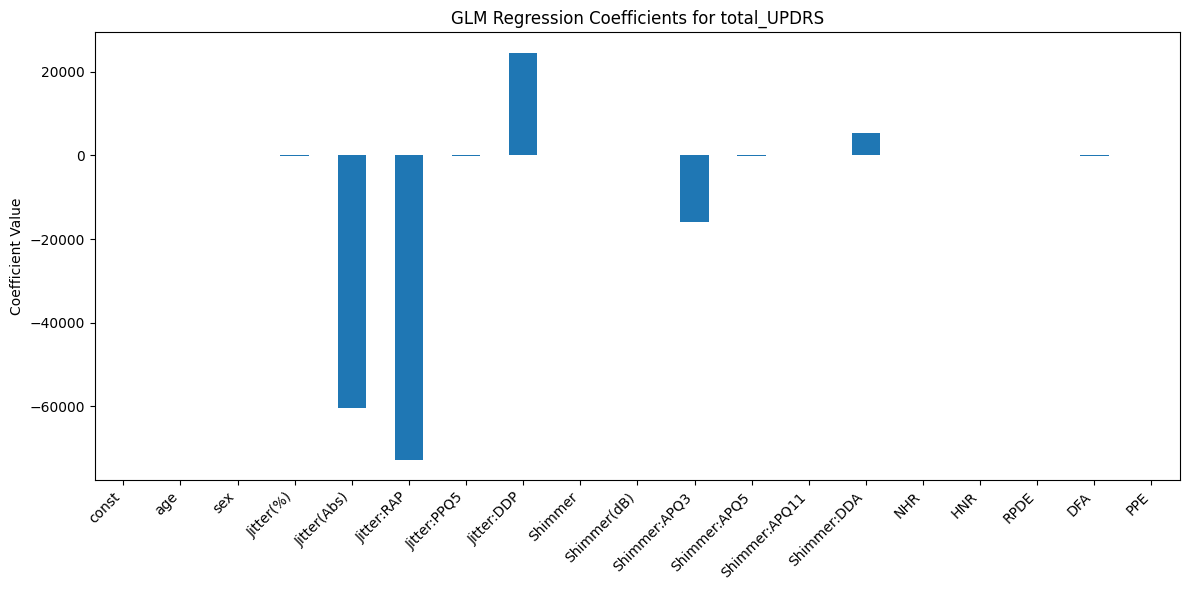

In [12]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

features = ['age', 'sex'] + list(df1.columns[7:])
print("Features used:", features)

X = df1[features].values
y = df1['total_UPDRS'].values

X = sm.add_constant(X)

glm_model = sm.GLM(y, X, family=sm.families.Gaussian())
glm_results = glm_model.fit()

print(glm_results.summary())
coefficients = pd.Series(glm_results.params, index=['const'] + features)

plt.figure(figsize=(12,6))
coefficients.plot(kind='bar')
plt.ylabel('Coefficient Value')
plt.title('GLM Regression Coefficients for total_UPDRS')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Task 3.3 (1 point)

Now, evaluate how accurately this model can predict the true symptom scores. To do this compute the correlation between the true and predicted symptom scores as well as the explained variance score. Print these values.

Hint: the explained variance can be computed as $1-var(y-\hat{y})/var(y)$ where $y$ and $\hat{y}$ are the true and predicted labels respectively.

In [13]:
X = sm.add_constant(X)
y_pred = glm_results.predict(X)

correlation = np.corrcoef(y, y_pred)[0, 1]
explained_variance = 1 - np.var(y - y_pred) / np.var(y)

print(f"Explained variance: {explained_variance:.3f}")
print(f"Correlation: {correlation:.3f}")

Explained variance: 0.174
Correlation: 0.418


### Task 3.4 (1 point)

Now compute the predictions on the second dataset using the coefficients estimated on the first dataset. Compute and print the correlation and explained variance as above

In [14]:
df2 = pd.read_csv("parkinsons_updrs_dataset2.csv")
df2.shape

features = ['age', 'sex'] + list(df1.columns[7:])
print("Features used:", features)

X2 = df2[features].values
y2 = df2['total_UPDRS'].values

intercept2 = np.ones((X2.shape[0], 1))
X2 = np.hstack((intercept2, X2))

y2_pred = np.dot(X2, coefficients)

correlation2 = np.corrcoef(y2, y2_pred)[0,1]
explained_variance2 = 1 - np.var(y2 - y2_pred)/np.var(y2)

print(f"Explained variance score: {explained_variance2:.3f}")
print(f"Correlation between true and predicted symptom scores: {correlation2:.3f}")

Features used: ['age', 'sex', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']
Explained variance score: 0.156
Correlation between true and predicted symptom scores: 0.396


### Task 3.5 (1 point)

Now, we are going to interpret these results. Please answer the following questions:

1. Can you see evidence for overfitting? why or why not?

There is little overfitting because the model explains roughly 17% of variance on training and 16% on test with correlation dropping slightly from 0.42 to 0.40.The difference between the test data and the train data is very low.

2. Which do you think might be the most important explanatory variables ? Explain why you think that

Features with larger absolute coefficients have a bigger effect on the outcome and which are statistically significant. From df1, we can conclude that jitter(ABS), DFA and PPE explain the data the most.  

### Task 3.6 (2 points)

Now write a piece of code to do PCA on the set of features mentioned in task 3.2 above (i.e. age, sex and the 16 biomedical voice measurements) from the first dataset.

Then predict the total UPDRS score for the second dataset on the basis of the first 3 principal components. In order to make sure this is unbiased do this in a way that ensures the second dataset is completely independent (i.e. as if someone else has it).

Compute the explained variance and compare with what you have above. In your opinion does using three principal components provide adequate compression for this task? Why or why not?

_Hint: you will need to project the data onto the principal components. This can be done efficiently using a matrix operation_

In [15]:
features = ['age','sex'] + list(df1.columns[7:])

X1 = df1[features].values
y1 = df1['total_UPDRS'].values

mean_x1 = np.mean(X1, axis=0)
std_X1 = X1.std(axis=0)
X1_std = (X1 - mean_x1)/std_X1

cov_matrix = np.cov(X1_std, rowvar=False)

eig_vals, eig_vecs = np.linalg.eigh(cov_matrix)

idx = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[idx]
eig_vecs = eig_vecs[:, idx]

PCs = eig_vecs[:, :3]

X1_PCA = X1_std @ PCs
X1_pca_design = np.hstack([np.ones((X1_PCA.shape[0], 1)), X1_PCA])

beta_pca = np.linalg.inv(X1_pca_design.T @ X1_pca_design) @ X1_pca_design.T @ y

X2 = df2[features].values
y2 = df2['total_UPDRS'].values

X2_std = (X2 - mean_x1)/std_X1

X2_PCA = X2_std @ PCs
X2_pca_design = np.hstack((np.ones((X2_PCA.shape[0], 1)), X2_PCA))

y2_pred_pca = X2_pca_design @ beta_pca

explained_variance_pca = 1 - np.var(y2 - y2_pred_pca)/np.var(y2)

print(f"Explained variance score: {explained_variance_pca:.3f}")

explained_var_ratio = eig_vals / np.sum(eig_vals)
cumulative_var = np.cumsum(explained_var_ratio)

print("Variance explained by first 3 PCs:", cumulative_var[:3])

Explained variance score: 0.038
Variance explained by first 3 PCs: [0.62802931 0.72170457 0.80448443]


This explained variance score of 0.038 is really low. Compared to the other explained variance of 0.174 and 0.156 for df1 and df2 respectively. However, the three PCA with the highest variance explained gives 80,4% and still has a low explained variance score of 0.038. This could be caused by that the model is tested on completely unseen data or that the PCA is unsupervised which finds directions of maximum variance in the features, not directions most predictive of UPDRS.